In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('../DataSets/winequality-red.csv')
sorted(pd.unique(raw_data['quality']))

[3, 4, 5, 6, 7, 8]

In [3]:
bins = [2, 4.5, 5.5 , 8] # it divide the classes into 3 categories between 2-4.5 , 4.5-5.5 , 5.5-8
label = [0,1,2]   # ['bad' , 'average' , 'good']
#print(pd.cut(train_data['quality'] , bins).head())
raw_data['quality'] = pd.cut(raw_data['quality'] , bins ,labels=label)
raw_data['quality'].head()

0    1
1    1
2    1
3    2
4    1
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [4]:
train_data = raw_data.iloc[ : int(raw_data.shape[0] * .75) , :]
test_data = raw_data.iloc[int(raw_data.shape[0] * .75) : , :]
train_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [8]:
train_data_labels = train_data['quality']
test_data_labels = test_data['quality']
del train_data['quality'] , test_data['quality']

In [9]:
# Standardize data
train_data_normalize = ((train_data - np.mean(train_data)) / np.std(train_data))
test_data_normalize = ((test_data - np.mean(test_data)) / np.std(test_data))
train_data_normalize.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.687948,1.009682,-1.491607,-0.525724,-0.274715,-0.415701,-0.379669,0.394939,1.354414,-0.601306,-0.900712
1,-0.463362,2.014523,-1.491607,0.028111,0.180864,0.956022,0.592778,-0.137748,-0.631550,0.081104,-0.534222
2,-0.463362,1.344629,-1.288220,-0.209247,0.056615,-0.023780,0.209693,-0.031210,-0.247170,-0.089499,-0.534222
3,1.445622,-1.334945,1.355818,-0.525724,-0.295423,0.172180,0.386501,0.501476,-0.887804,-0.487571,-0.534222
4,-0.687948,1.009682,-1.491607,-0.525724,-0.274715,-0.415701,-0.379669,0.394939,1.354414,-0.601306,-0.900712


In [13]:
train_data_normalize = np.array(train_data_normalize)
train_data_labels = np.array(train_data_labels)

test_data_normalize = np.array(test_data_normalize)
test_data_labels = np.array(test_data_labels)

In [190]:
class NeuralNetwork():
    
    def __init__(self,lmda = 0):
        
        self.input_layer_n   = 11
        
        self.hidden_layer1_n = 15
        self.hidden_layer2_n = 15
        self.hidden_layer3_n = 15
        
        
        self.output_layer = 3
        self.lmda = lmda
        self.label_length = 3

        
        self.theta_layer1 = np.random.randn(self.input_layer_n   , self.hidden_layer1_n)
        self.theta_layer2 = np.random.randn(self.hidden_layer1_n , self.hidden_layer2_n)
        self.theta_layer3 = np.random.randn(self.hidden_layer2_n , self.hidden_layer3_n)
        self.theta_layer4 = np.random.randn(self.hidden_layer3_n , self.output_layer)
        
        self.bias1 = np.random.randn(self.hidden_layer1_n)
        self.bias2 = np.random.randn(self.hidden_layer2_n)
        self.bias3 = np.random.randn(self.hidden_layer3_n)
        self.bias4 = np.random.randn(self.output_layer)
       
        
    def one_hot_label(self , data , label_length):
        one_hot_labels = np.zeros((data.shape[0] , label_length))
        for i in range(data.shape[0]):  
            one_hot_labels[i, data[i]-3 ] = 1  # our labels is 3,4,5,6,7,8 is we subtract by 3 it is 0,1,2,3,4,5
        return one_hot_labels


    def softmax(self , activation , theta , bias):
        exp = np.exp( np.dot( activation , theta ) + bias)
        denominator = np.sum( exp , axis = 1)
        s = list(map(lambda i : exp[:,i] / denominator , np.arange(self.label_length)))
        return np.array(s).T
        
    def relu(self,activation,theta, bias):
        q = (np.dot(activation , theta) + bias)
        return np.clip(q , a_min=0 , a_max = q)
    
    def forwardPropagation(self,X):
        self.activation_layer_0 = X
        self.activation_layer_1 = self.relu(self.activation_layer_0 , self.theta_layer1 , self.bias1)
        self.activation_layer_2 = self.relu(self.activation_layer_1 , self.theta_layer2 , self.bias2)
        self.activation_layer_3 = self.relu(self.activation_layer_2 , self.theta_layer3 , self.bias3)
        self.activation_layer_4 = self.softmax(self.activation_layer_3 , self.theta_layer4 , self.bias4)
        
        return self.activation_layer_4
        
    def costFunction(self,X,y):
        ''' Provide labels as "Y" '''
        
        self.y = self.one_hot_label( y , self.label_length)
        self.y_pred = self.forwardPropagation(X)
        np.nan_to_num(self.y_pred , copy = False)
        self.crossEntropy = self.y * np.log(self.y_pred)
        np.nan_to_num(self.crossEntropy, copy=False)
        regu = self.lmda * (np.sum(self.theta_layer1)**2 + np.sum(self.theta_layer2)**2 + np.sum(self.theta_layer3)**2 + np.sum(self.theta_layer4)**2)
        return -np.sum(self.crossEntropy) + regu  # regu = 0 bcz lmda is zero 
      
    
    def costFunctionDerivative(self,X,y):
        
        self.y_cap = self.forwardPropagation(X)
        self.target_y = self.one_hot_label(y , self.label_length)
        
        dL_dA4 = (self.y_cap - self.target_y)
        dL_dA3 = np.dot( dL_dA4 , self.theta_layer4.T )
        dL_dA2 = np.dot( dL_dA3 , self.theta_layer3.T )
        dL_dA1 = np.dot( dL_dA2 , self.theta_layer2.T )
        
        
        dL_dtheta_layer_4 =  1/X.shape[0] * (np.dot(self.activation_layer_3.T , dL_dA4) + 2*(self.lmda * self.theta_layer4))
        dL_dtheta_layer_3 =  1/X.shape[0] * (np.dot(self.activation_layer_2.T , dL_dA3) + 2*(self.lmda * self.theta_layer3))
        dL_dtheta_layer_2 =  1/X.shape[0] * (np.dot(self.activation_layer_1.T , dL_dA2) + 2*(self.lmda * self.theta_layer2))
        dL_dtheta_layer_1 =  1/X.shape[0] * (np.dot(self.activation_layer_0.T , dL_dA1) + 2*(self.lmda * self.theta_layer1))       
        
        dL_dbias4 =  1/X.shape[0] * dL_dA4
        dL_dbias3 =  1/X.shape[0] * dL_dA3
        dL_dbias2 =  1/X.shape[0] * dL_dA2
        dL_dbias1 =  1/X.shape[0] * dL_dA1
        
         
        return dL_dtheta_layer_1, dL_dtheta_layer_2, dL_dtheta_layer_3 , dL_dtheta_layer_4 ,dL_dbias1 , dL_dbias2 ,dL_dbias3 , dL_dbias4  
      

In [196]:
def gradientDecent(NN , X , y , batch ):
    alpha = 0.01
    epsilon = 0.0001
    i = 1
    itera = []
    csfun = []
    while i < 1000:
        index = np.random.randint(0 , X.shape[0] , size=(batch,))
        
        initial_cost = NN.costFunction(X[index] , y[index] )
       
        theta1 , theta2 ,theta3 , theta4 , bias1 , bias2 ,  bias3 , bias4   = NN.costFunctionDerivative(X[index], y[index] )
        
        NN.theta_layer1 -=  (alpha * theta1)
        NN.theta_layer2 -=  (alpha * theta2)
        NN.theta_layer3 -=  (alpha * theta3)
        NN.theta_layer4 -=  (alpha * theta4)
        
        
        NN.bias1 -= (alpha * bias1.sum(axis = 0))
        NN.bias2 -= (alpha * bias2.sum(axis = 0))
        NN.bias3 -= (alpha * bias3.sum(axis = 0))
        NN.bias4 -= (alpha * bias4.sum(axis = 0))
        
        final_cost = NN.costFunction(X[index] , y[index])
        
        if final_cost == np.inf or final_cost == np.nan:
            break

        print('Iteration {} Initial cost {} final cost {}'.format(i , initial_cost , final_cost))    
        
        itera.append(i)
        csfun.append(final_cost)
        i+=1
    return itera , csfun

In [264]:
NN = NeuralNetwork()
itera , csfun = gradientDecent(NN , train_data_normalize , train_data_labels , 24)

Iteration 1 Initial cost 2594.088419725039 final cost 632.6362201285285
Iteration 2 Initial cost 750.279297015294 final cost 459.8636000785948
Iteration 3 Initial cost 329.17652724938637 final cost 134.11744221494928
Iteration 4 Initial cost 443.89212411503854 final cost 401.86102202756337
Iteration 5 Initial cost 341.2553591431777 final cost 245.8816067494323
Iteration 6 Initial cost 341.76954234516415 final cost 184.6001651068094
Iteration 7 Initial cost 174.84305264671298 final cost 118.78160299198052
Iteration 8 Initial cost 78.61653896429229 final cost 65.32125220185294
Iteration 9 Initial cost 209.29767645565516 final cost 170.23238586907488
Iteration 10 Initial cost 176.4022905825512 final cost 124.13842386886064
Iteration 11 Initial cost 142.855245583963 final cost 116.81832818512423
Iteration 12 Initial cost 43.16561700163994 final cost 62.56042803531075
Iteration 13 Initial cost 114.8185185091576 final cost 73.61787717088954
Iteration 14 Initial cost 174.57825515627752 final 

Iteration 276 Initial cost 30.774764124067488 final cost 23.684153318118288
Iteration 277 Initial cost 29.517527413227583 final cost 20.082123481740418
Iteration 278 Initial cost 59.68878677981796 final cost 40.22149314357527
Iteration 279 Initial cost 27.486384038309172 final cost 22.90072996674831
Iteration 280 Initial cost 50.4876219607585 final cost 42.236641524373965
Iteration 281 Initial cost 50.60963852409681 final cost 27.856595188227942
Iteration 282 Initial cost 35.40258385764827 final cost 27.596878263794284
Iteration 283 Initial cost 20.6494528967797 final cost 17.45325282666085
Iteration 284 Initial cost 26.600299711566443 final cost 23.331047102833494
Iteration 285 Initial cost 34.53993063978925 final cost 26.68245049576546
Iteration 286 Initial cost 26.985670068114242 final cost 20.54660517845632
Iteration 287 Initial cost 22.701828332598396 final cost 19.834993410716713
Iteration 288 Initial cost 21.46213522952645 final cost 18.770120624582326
Iteration 289 Initial cost

Iteration 577 Initial cost 30.67366901995917 final cost 23.583418453701405
Iteration 578 Initial cost 19.115510904966232 final cost 13.645186960779393
Iteration 579 Initial cost 9.23928196646688 final cost 7.995903145562923
Iteration 580 Initial cost 35.684679766172124 final cost 23.184916253396516
Iteration 581 Initial cost 20.22215834667381 final cost 13.547656948895664
Iteration 582 Initial cost 15.458571111835894 final cost 12.655589025700909
Iteration 583 Initial cost 22.915139025177865 final cost 16.016975039515998
Iteration 584 Initial cost 12.656632668145058 final cost 10.661944838873518
Iteration 585 Initial cost 24.684633749453628 final cost 20.853162376974556
Iteration 586 Initial cost 17.71738538398496 final cost 14.842549260432541
Iteration 587 Initial cost 18.05604154197345 final cost 13.069327702620177
Iteration 588 Initial cost 35.72405955924541 final cost 18.229440678606966
Iteration 589 Initial cost 18.460065345931163 final cost 14.35348359963654
Iteration 590 Initial

Iteration 876 Initial cost 17.92984377312699 final cost 17.144921064284226
Iteration 877 Initial cost 10.462233354655616 final cost 9.374182472693114
Iteration 878 Initial cost 9.795086713119733 final cost 7.285932579024579
Iteration 879 Initial cost 20.626133983194272 final cost 17.22398699096359
Iteration 880 Initial cost 19.674882905978162 final cost 17.20851367316361
Iteration 881 Initial cost 31.12709533506581 final cost 26.78466545608863
Iteration 882 Initial cost 9.099899837479093 final cost 8.916672209905247
Iteration 883 Initial cost 33.82640026784025 final cost 28.812108029890695
Iteration 884 Initial cost 16.812642875487487 final cost 13.908292851295277
Iteration 885 Initial cost 10.148885281316488 final cost 9.435765840878425
Iteration 886 Initial cost 23.321263312400013 final cost 18.647810496301013
Iteration 887 Initial cost 17.79617798387923 final cost 13.277544177744018
Iteration 888 Initial cost 24.46748200548709 final cost 19.932104591229294
Iteration 889 Initial cost

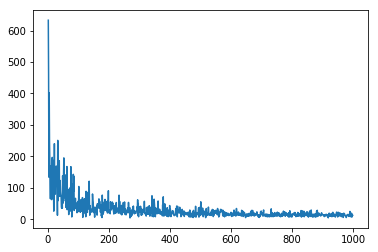

In [265]:
plt.plot(itera , csfun)

In [266]:
qq = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1))
co=0
for i in range(len(train_data_labels)):
    if qq[i] == train_data_labels[i]:
        co+=1
print('accuracy :')
print((co/len(train_data_labels))*100,"%")

accuracy :
71.05921601334445 %


In [267]:
qq = (np.argmax(NN.forwardPropagation(test_data_normalize) , axis=1))
co=0
for i in range(len(test_data_labels)):
    if qq[i] == test_data_labels[i]:
        co+=1
print('accuracy :')
print((co/len(test_data_labels))*100,"%")

accuracy :
64.75 %


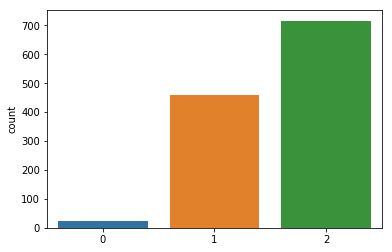

In [268]:
z  = (np.argmax(NN.forwardPropagation(train_data_normalize) , axis=1)) 
sns.countplot(z)

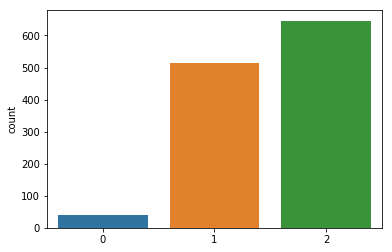

In [269]:
sns.countplot(train_data_labels)

In [270]:
from  sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(train_data_labels , z))
print(classification_report(train_data_labels , z))

[[  5  18  17]
 [ 13 324 176]
 [  5 118 523]]
             precision    recall  f1-score   support

          0       0.22      0.12      0.16        40
          1       0.70      0.63      0.67       513
          2       0.73      0.81      0.77       646

avg / total       0.70      0.71      0.70      1199

